In [7]:
import pandas as pd
import seaborn as  sns
data=pd.read_csv('emails.csv')
data.head()

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


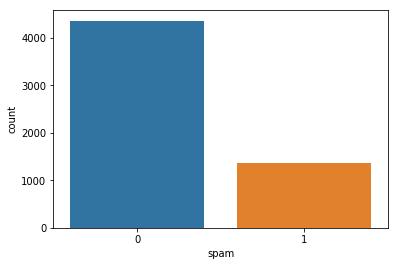

In [4]:
sns.countplot(x="spam",data=data)

In [30]:
data.isnull().any()
data['length']=data['text'].apply(len)
x=text_process(data['text'][0])
d={}
for word in x:
    if word not in d:
        d[word]=1
    else:
        d[word]+=1
for word in d:
    print(word)

Subject
naturally
irresistible
corporate
identity
lt
really
hard
recollect
company
market
full
suqgestions
information
isoverwhelminq
good
catchy
logo
stylish
statlonery
outstanding
website
make
task
much
easier
promise
havinq
ordered
iogo
automaticaily
become
world
ieader
isguite
ciear
without
products
effective
business
organization
practicable
aim
hotat
nowadays
marketing
efforts
list
clear
benefits
creativeness
hand
made
original
logos
specially
done
reflect
distinctive
image
convenience
stationery
provided
formats
easy
use
content
management
system
letsyou
change
even
structure
promptness
see
drafts
within
three
days
affordability
break
gaps
budget
100
satisfaction
guaranteed
provide
unlimited
amount
changes
extra
fees
surethat
love
result
collaboration
look
portfolio
interested


In [2]:
from sklearn.model_selection import train_test_split

In [3]:
from nltk.corpus import stopwords
import string
def text_process(mess):
    nopunc=[char for char in mess if char not in string.punctuation]
    nopunc="".join(nopunc)
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [12]:
x=stopwords.words('french')


In [32]:
del data['length']

In [4]:
data['words']=data['text'].apply(text_process)

In [7]:
from sklearn.feature_extraction.text import CountVectorizer
bow_transformer=CountVectorizer(analyzer=text_process).fit(data['text'])

In [8]:
bow_transformer

CountVectorizer(analyzer=<function text_process at 0x09CA20C0>, binary=False,
        decode_error='strict', dtype=<class 'numpy.int64'>,
        encoding='utf-8', input='content', lowercase=True, max_df=1.0,
        max_features=None, min_df=1, ngram_range=(1, 1), preprocessor=None,
        stop_words=None, strip_accents=None,
        token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, vocabulary=None)

In [9]:
text_counts= bow_transformer.fit_transform(data['text'])

In [38]:
import pickle
filename='C:/Users/HP/Desktop/spam_vectorizer.sav'
pickle.dump(bow_transformer, open(filename, 'wb'))

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    text_counts, data['spam'], test_size=0.3, random_state=1)

In [15]:
from sklearn.naive_bayes import MultinomialNB
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Generation Using Multinomial Naive Bayes
model = MultinomialNB().fit(X_train, y_train)
predicted= model.predict(X_test)
print("MultinomialNB Accuracy:",metrics.accuracy_score(y_test, predicted))

MultinomialNB Accuracy: 0.9918557300756253


In [41]:
predicted= model.predict(bow4)
predicted[0]

0

In [33]:
import pickle
filename='C:/Users/HP/Desktop/spam_model.sav'
pickle.dump(model, open(filename, 'wb'))

In [5]:
#text_count= bow_transformer.fit_transform()

In [37]:
x=data['text'][27]
x=text_process(x)
bow4=bow_transformer.transform([x])
print(data['text'][27])

Subject: hi  how to save o improper n your medlcatlons over 70 % .  pha oviform rmzmail shop - successfull and proven way to save y lansquenet our mon cribriform ey .  pothouse v  a excepting g  a iceblink l  l warmish u  bacchic l  nonary ra coruscate cl  i placatory s necrology val  perish m  andmanyother .  * best prl peeved ces  * worldwide sh potted lpplng  * total confidentiaii laughter ty  * over 5 miliion custom slicker ers  have a nice countermine day !


In [34]:
x='hey brother where are you now i been calling for two last hours without any answer'
#x=text_process(x)
bow4=bow_transformer.transform([x])
bow4

<1x37229 sparse matrix of type '<class 'numpy.int64'>'
	with 8 stored elements in Compressed Sparse Row format>

In [21]:
predicted= clf.predict(bow4)
predicted

array([0], dtype=int64)